In [1]:
import sys; sys.path.insert(0, '../..')

import fenics as fa
import matplotlib.pyplot as plt
import mshr
import numpy as np
import pdb
import argparse
import jax
from collections import namedtuple

from src.nonlinear_stokes.nonlinear_stokes_common import (
    plot_solution,
    loss_fn,
    fenics_to_jax,
    SecondOrderTaylorLookup,
    error_on_coords,
    sample_params,
    sample_points,
)

from src.nonlinear_stokes.nonlinear_stokes_fenics import (
    solve_fenics,
    is_defined,
    parser
)

In [2]:
args = parser.parse_args("")
args = namedtuple("ArgsTuple", vars(args))(**vars(args))

params = sample_params(jax.random.PRNGKey(args.seed), args)
source_params, bc_params, per_hole_params, num_holes = params
print("params: ", params)

/usr/local/anaconda3/envs/dvvf/lib/python3.6/site-packages/jax/lib/xla_bridge.py:130: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


params:  (DeviceArray([0.4130522 , 0.25975317], dtype=float32), DeviceArray([3000.803], dtype=float32), DeviceArray([[ 0.04156993, -0.0613506 ,  0.47837767,  0.20494777,
               0.44709057],
             [-0.03926784, -0.11530625,  0.10562178,  0.4114218 ,
               0.35706055],
             [-0.04186818,  0.01709074,  0.18381561, -0.53561956,
               0.29799348]], dtype=float32), DeviceArray(1, dtype=int32))


In [3]:
u_p = solve_fenics(params)

In [4]:
points = sample_points(jax.random.PRNGKey(args.seed + 1), 1024, params)
points_on_inlet, points_on_walls, points_on_holes, points_in_domain = points

all_points = np.concatenate(points)

In [5]:
x0 = points_in_domain[100]


In [6]:
taylor = SecondOrderTaylorLookup(u_p, [x0])

In [7]:
direction = np.array([-1./np.sqrt(2), 1./np.sqrt(2)])
epsilons = []
errs = []
yhats = []
ys = []
for dsize in np.linspace(1e-3, 1e-0, 1000):
    x = x0 + direction * dsize
    y = np.array(u_p(x))
    yhat = np.array(taylor(x)).reshape(y.shape)
    yhats.append(yhat)
    ys.append(y)
    err = np.linalg.norm(y - yhat)
    errs.append(err)
    epsilons.append(np.linalg.norm(direction * dsize))
    print("delta size: {}, err {:.3e}".format(np.linalg.norm(direction*dsize), err))

delta size: 0.001, err 2.160e-02
delta size: 0.002, err 3.150e-02
delta size: 0.0029999999999999996, err 2.983e-02
delta size: 0.004, err 1.707e-02
delta size: 0.004999999999999999, err 1.226e-02
delta size: 0.005999999999999999, err 4.741e-02
delta size: 0.007, err 9.586e-02
delta size: 0.008, err 1.561e-01
delta size: 0.009000000000000001, err 2.282e-01
delta size: 0.010000000000000002, err 3.119e-01
delta size: 0.010999999999999998, err 4.074e-01
delta size: 0.011999999999999999, err 5.146e-01
delta size: 0.013000000000000001, err 6.336e-01
delta size: 0.014000000000000002, err 7.642e-01
delta size: 0.014999999999999998, err 9.066e-01
delta size: 0.016, err 1.017e+00
delta size: 0.016999999999999998, err 9.482e-01
delta size: 0.018000000000000002, err 8.927e-01
delta size: 0.019, err 8.504e-01
delta size: 0.019999999999999997, err 8.212e-01
delta size: 0.021, err 8.049e-01
delta size: 0.022, err 8.014e-01
delta size: 0.022999999999999996, err 8.103e-01
delta size: 0.0239999999999999

delta size: 0.22999999999999998, err 4.530e+02
delta size: 0.231, err 4.587e+02
delta size: 0.232, err 4.643e+02
delta size: 0.23299999999999998, err 4.700e+02
delta size: 0.23399999999999999, err 4.758e+02
delta size: 0.235, err 4.816e+02
delta size: 0.236, err 4.874e+02
delta size: 0.237, err 4.933e+02
delta size: 0.238, err 4.992e+02
delta size: 0.239, err 5.052e+02
delta size: 0.24000000000000002, err 5.112e+02
delta size: 0.24099999999999996, err 5.172e+02
delta size: 0.24199999999999997, err 5.233e+02
delta size: 0.24299999999999997, err 5.294e+02
delta size: 0.24399999999999997, err 5.356e+02
delta size: 0.24499999999999997, err 5.418e+02
delta size: 0.246, err 5.481e+02
delta size: 0.247, err 5.544e+02
delta size: 0.24799999999999997, err 5.607e+02
delta size: 0.249, err 5.671e+02
delta size: 0.24999999999999997, err 5.735e+02
delta size: 0.251, err 5.800e+02
delta size: 0.252, err 5.865e+02
delta size: 0.25299999999999995, err 5.930e+02
delta size: 0.25399999999999995, err 5.9

delta size: 0.44299999999999995, err 2.697e+03
delta size: 0.444, err 2.713e+03
delta size: 0.44499999999999995, err 2.728e+03
delta size: 0.44599999999999995, err 2.743e+03
delta size: 0.44699999999999995, err 2.759e+03
delta size: 0.448, err 2.774e+03
delta size: 0.44899999999999995, err 2.790e+03
delta size: 0.45, err 2.805e+03
delta size: 0.45099999999999996, err 2.821e+03
delta size: 0.45199999999999996, err 2.837e+03
delta size: 0.453, err 2.853e+03
delta size: 0.45399999999999996, err 2.869e+03
delta size: 0.45499999999999996, err 2.884e+03
delta size: 0.45599999999999996, err 2.900e+03
delta size: 0.45699999999999996, err 2.916e+03
delta size: 0.45799999999999996, err 2.932e+03
delta size: 0.45899999999999996, err 2.948e+03
delta size: 0.45999999999999996, err 2.964e+03
delta size: 0.46099999999999997, err 2.981e+03
delta size: 0.462, err 2.997e+03
delta size: 0.46299999999999997, err 3.013e+03
delta size: 0.464, err 3.029e+03
delta size: 0.46499999999999997, err 3.045e+03
delt

delta size: 0.6489999999999999, err 6.889e+03
delta size: 0.65, err 6.915e+03
delta size: 0.6509999999999999, err 6.941e+03
delta size: 0.652, err 6.967e+03
delta size: 0.653, err 6.992e+03
delta size: 0.6539999999999999, err 7.018e+03
delta size: 0.655, err 7.044e+03
delta size: 0.6559999999999999, err 7.071e+03
delta size: 0.657, err 7.097e+03
delta size: 0.6579999999999999, err 7.123e+03
delta size: 0.659, err 7.149e+03
delta size: 0.6599999999999999, err 7.175e+03
delta size: 0.6609999999999999, err 7.202e+03
delta size: 0.662, err 7.228e+03
delta size: 0.6629999999999999, err 7.255e+03
delta size: 0.664, err 7.281e+03
delta size: 0.6649999999999999, err 7.308e+03
delta size: 0.666, err 7.334e+03
delta size: 0.6669999999999999, err 7.361e+03
delta size: 0.668, err 7.388e+03
delta size: 0.6689999999999999, err 7.414e+03
delta size: 0.6699999999999999, err 7.441e+03
delta size: 0.671, err 7.468e+03
delta size: 0.672, err 7.495e+03
delta size: 0.673, err 7.522e+03
delta size: 0.673999

delta size: 0.8619999999999999, err 1.354e+04
delta size: 0.8629999999999999, err 1.357e+04
delta size: 0.8639999999999999, err 1.361e+04
delta size: 0.865, err 1.365e+04
delta size: 0.866, err 1.368e+04
delta size: 0.8669999999999999, err 1.372e+04
delta size: 0.8679999999999999, err 1.375e+04
delta size: 0.8689999999999999, err 1.379e+04
delta size: 0.87, err 1.383e+04
delta size: 0.8709999999999999, err 1.386e+04
delta size: 0.8719999999999999, err 1.390e+04
delta size: 0.8729999999999999, err 1.394e+04
delta size: 0.8739999999999999, err 1.397e+04
delta size: 0.8749999999999999, err 1.401e+04
delta size: 0.8759999999999999, err 1.405e+04
delta size: 0.8769999999999999, err 1.408e+04
delta size: 0.8779999999999999, err 1.412e+04
delta size: 0.879, err 1.416e+04
delta size: 0.8799999999999999, err 1.419e+04
delta size: 0.8809999999999999, err 1.423e+04
delta size: 0.8819999999999999, err 1.427e+04
delta size: 0.883, err 1.431e+04
delta size: 0.8839999999999998, err 1.434e+04
delta si

In [8]:
y = np.array(u_p(x0))
yhat = np.array(taylor(x0)).reshape(y.shape)
np.linalg.norm(y - yhat)

0.00016434752238266595

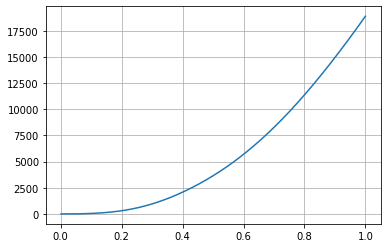

In [9]:
plt.plot(np.array(epsilons), np.array(errs))
plt.grid()

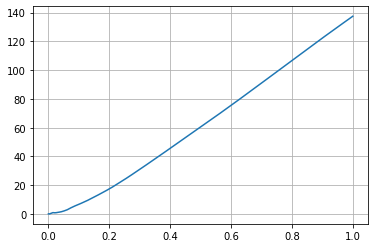

In [10]:
plt.plot(np.array(epsilons), np.array(errs)**(1/2))
plt.grid()

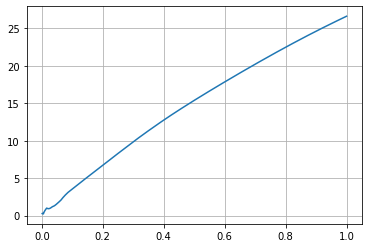

In [11]:
plt.plot(np.array(epsilons), np.array(errs)**(1/3))
plt.grid()

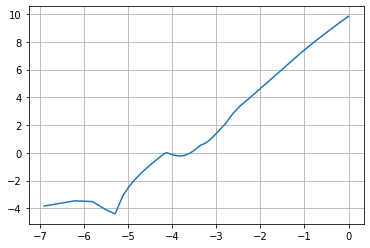

In [12]:
plt.plot(np.log(epsilons), np.log(errs))
plt.grid()

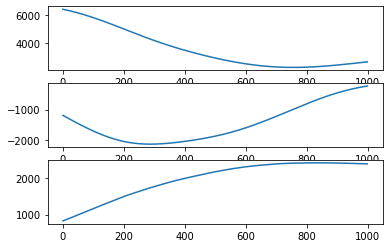

In [13]:
plt.subplot(3,1,1)
plt.plot(np.array(ys)[:, 0])
plt.subplot(3,1,2)
plt.plot(np.array(ys)[:, 1])
plt.subplot(3,1,3)
plt.plot(np.array(ys)[:, 2])

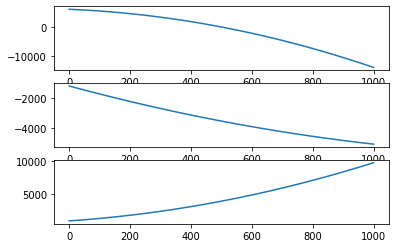

In [14]:
plt.subplot(3,1,1)
plt.plot(np.array(yhats)[:, 0])
plt.subplot(3,1,2)
plt.plot(np.array(yhats)[:, 1])
plt.subplot(3,1,3)
plt.plot(np.array(yhats)[:, 2])